# Proj-H402 : Deep Neural Network Image Processing
## Brain tumor classification

-------
###  Imports and definition of functions

In [3]:
import numpy as np

import matplotlib.pyplot as plt

import os
import itertools

import imutils
import cv2

In [6]:
def crop_imgs(im, add_pixels_value=0):
    
   # Finds the extreme points on the image and crops the rectangular out of them
    img = cv2.imread(im)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    ADD_PIXELS = add_pixels_value
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

    return new_img

-------
## Cropping of images
The original dataset comes from https://github.com/sartajbhuvaji/brain-tumor-classification-dataset  
Since black pixels of the background are irrelevant, it would be interresting to crop the images in order to keep the essential. 

(382, 360, 1)


(-0.5, 359.5, 381.5, -0.5)

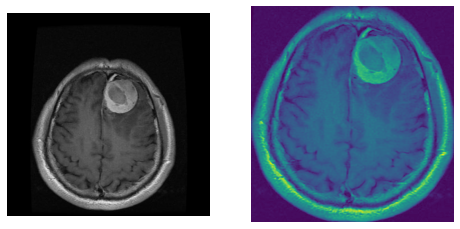

In [18]:
im = cv2.imread('Training/meningioma_tumor/m1(71).jpg')
im_cropped = crop_imgs('Training/meningioma_tumor/m1(71).jpg', add_pixels_value=0)
im_gray = np.expand_dims(cv2.cvtColor(im_cropped, cv2.COLOR_RGB2GRAY), axis=2)
print(im_gray.shape)

plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.imshow(im)
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(im_gray)
plt.axis("off")


In [9]:
type(im_cropped)

numpy.ndarray

In [6]:
!mkdir Training_cropped
!mkdir Training_cropped/glioma_tumor
!mkdir Training_cropped/meningioma_tumor
!mkdir Training_cropped/no_tumor
!mkdir Training_cropped/pituitary_tumor

In [7]:
tr_glioma = os.listdir('Training/glioma_tumor')
tr_meningioma = os.listdir('Training/meningioma_tumor')
tr_no = os.listdir('Training/no_tumor')
tr_pituitary = os.listdir('Training/pituitary_tumor')


for images in tr_glioma:
    if not images.startswith('.'):
        cropped_images = crop_imgs('Training/glioma_tumor/' + images)
        path = 'Training_cropped/glioma_tumor/' + images
        imsave(path, cropped_images)

for images in tr_meningioma:
    if not images.startswith('.'):
        cropped_images = crop_imgs('Training/meningioma_tumor/' + images)
        path = 'Training_cropped/meningioma_tumor/' + images
        imsave(path, cropped_images)

for images in tr_no:
    if not images.startswith('.'):
        cropped_images = crop_imgs('Training/no_tumor/' + images)
        path = 'Training_cropped/no_tumor/' + images
        imsave(path, cropped_images)
    
for images in tr_pituitary:
    if not images.startswith('.'):
        cropped_images = crop_imgs('Training/pituitary_tumor/' + images)
        path = 'Training_cropped/pituitary_tumor/' + images
        imsave(path, cropped_images)

In [28]:
!mkdir Testing_cropped
!mkdir Testing_cropped/glioma_tumor
!mkdir Testing_cropped/meningioma_tumor
!mkdir Testing_cropped/no_tumor
!mkdir Testing_cropped/pituitary_tumor

In [29]:
tr_glioma = os.listdir('Testing/glioma_tumor')
tr_meningioma = os.listdir('Testing/meningioma_tumor')
tr_no = os.listdir('Testing/no_tumor')
tr_pituitary = os.listdir('Testing/pituitary_tumor')

for images in tr_glioma:
    if not images.startswith('.'):
        cropped_images = crop_imgs('Testing/glioma_tumor/' + images)
        path = 'Testing_cropped/glioma_tumor/' + images
        imsave(path, cropped_images)

for images in tr_meningioma:
    if not images.startswith('.'):
        cropped_images = crop_imgs('Testing/meningioma_tumor/' + images)
        path = 'Testing_cropped/meningioma_tumor/' + images
        imsave(path, cropped_images)

for images in tr_no:
    if not images.startswith('.'):
        cropped_images = crop_imgs('Testing/no_tumor/' + images)
        path = 'Testing_cropped/no_tumor/' + images
        imsave(path, cropped_images)
    
for images in tr_pituitary:
    if not images.startswith('.'):
        cropped_images = crop_imgs('Testing/pituitary_tumor/' + images)
        path = 'Testing_cropped/pituitary_tumor/' + images
        imsave(path, cropped_images)